In [1]:
import nummericalResources as nr
import sympy as sp
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import matplotlib.gridspec as grdspc
import numpy as np

lightColor = "#FBBD53"
darkColor = "#0f4c75"

plt.rcParams["text.usetex"] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Dejavu Serif'
plt.rcParams["mathtext.fontset"] = "cm"

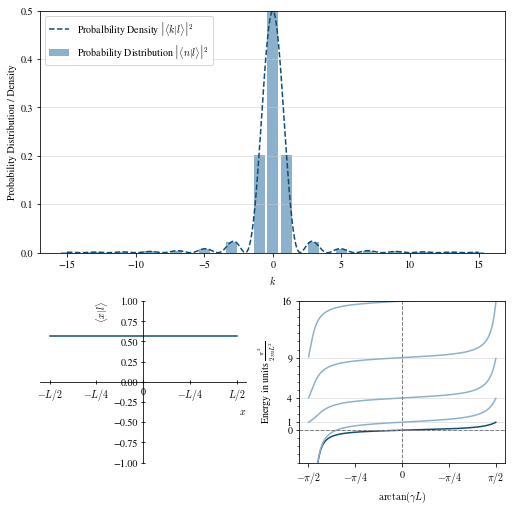

In [2]:
# Testing momentum distribution (general case with gamma_+ = gamma_- =: gammma)
L = np.pi
gamma = 50
l = 1
bound = 15
cStep = 0.1
dStep = 1
x = np.linspace(-L/2, L/2, 500)
k = np.arange(-bound, bound+cStep, cStep)*np.pi/L
kn = np.arange(-bound, bound+dStep, dStep)*np.pi/L

myPlot = nr.DumbPlot(gamma, L, l, k, kn, x)
myPlot.set_gamma(0.0001)
myPlot.update()
myPlot.updatePlot()
myPlot.display()


In [3]:
# Check normalization (Continuous)
L = np.pi
gamma = -50
l = 1
# Computing all kl values corresponding to gamma
allKl = nr.gamma_to_k(gamma, l, L)

integrateDistr = lambda k: nr.P_momentumContinuous(k, allKl, l, L)

integrate.quad(integrateDistr, -100000, 100000)

<ipython-input-3-8eb1cb78dbf0>:10: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integrate.quad(integrateDistr, -100000, 100000)


(0.9983424385884355, 1.0080199759260833)

In [4]:
# Check normalization (Discrete)

L = np.pi
gamma = -50
l = 1
bound = 150000
dStep = 1
kn = np.arange(-bound, bound+dStep, dStep)*np.pi/L
allKl = nr.gamma_to_k(gamma, l, L)

discDistr = nr.getP_momentumDiscrete(kn, allKl, l, L)[0]

np.sum(discDistr)



0.9997877934170739

Text(0, 0.5, 'Energy in units $\\frac{\\pi^2}{2m L^2}$')

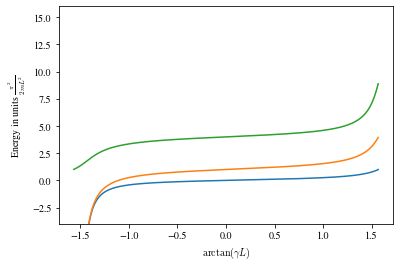

In [5]:
# Testing gamma_to_k function

# x- and y-axis are scaled such that the dependance on L can be absorbed in the units
gamma = np.tan(np.linspace(-np.pi/2+10**(-2), np.pi/2-10**(-2), 300))
plt.plot(np.arctan(gamma*L), np.real(np.power(nr.gamma_to_k(gamma, 1, L),2))*(L/np.pi)**2)
plt.plot(np.arctan(gamma*L), np.real(np.power(nr.gamma_to_k(gamma, 2, L),2))*(L/np.pi)**2)
plt.plot(np.arctan(gamma*L), np.real(np.power(nr.gamma_to_k(gamma, 3, L),2))*(L/np.pi)**2)
plt.ylim(-4, 16)

plt.xlabel(r"$\arctan(\gamma L)$")
plt.ylabel(r"Energy in units $\frac{\pi^2}{2m L^2}$")


In [6]:
# DEPRECATED

def plotAll(gamma, l, L, k, distr, kn, distrDisc, x, states, omitCplot=False):
    lightColor = "#8bb1cc"
    darkColor = "#0f4c75"

    plt.rcParams["text.usetex"] = False
    plt.rcParams['font.family'] = 'serif'
    plt.rcParams['font.serif'] = 'Dejavu Serif'
    plt.rcParams["mathtext.fontset"] = "cm"

    fig2 = plt.figure(constrained_layout=True, figsize=(7,7))
    gs = fig2.add_gridspec(nrows=2, ncols=2, height_ratios=[1.5,1])
    pDistrPlot = fig2.add_subplot(gs[0,:])
    gammaDepPlot = fig2.add_subplot(gs[1, 1])
    wavefuncPlot = fig2.add_subplot(gs[1, 0])

    # Plotting prob. distr.
    if not omitCplot: 
        pDistrPlot.plot(k, distr[0], c=darkColor, ls="--",label=r"Probalbility Density $\left\vert \langle k \vert l \rangle \right\vert^2$")
    pDistrPlot.bar(kn, distrDisc[0], color=lightColor,label=r"Probability Distribution $\left\vert \langle n \vert l \rangle \right\vert^2$")
    pDistrPlot.set_xlabel("$k$")
    pDistrPlot.set_ylabel("Probability Distribution / Density")
    pDistrPlot.legend(loc="upper left")
    pDistrPlot.grid(True, which="major", axis="y", lw=0.5, c="0.8")

    # Plotting energy dependance on gamma
    gammaRange = np.tan(np.linspace(-np.pi/2+10**(-2), np.pi/2-10**(-2), 300))
    for i in range(1, 6):
        if i==l:
            col=darkColor
        else:
            col=lightColor
        gammaDepPlot.plot(np.arctan(gammaRange*L), np.real(np.power(nr.gamma_to_k(gammaRange, i, L),2))*(L/np.pi)**2, color=col)
    gammaDepPlot.set_ylim([-4, 16])
    gammaDepPlot.axvline(np.arctan(gamma*L), ls="--", lw=1, color="0.5")
    gammaDepPlot.axhline(np.real(np.power(nr.gamma_to_k(gamma, l, L),2))*(L/np.pi)**2, ls="--", lw=1, color="0.5")
    gammaDepPlot.set_ylabel(r"Energy in units $\frac{\pi^2}{2m L^2}$")
    gammaDepPlot.set_xlabel(r"$\arctan(\gamma L)$")
    gammaDepPlot.set_xticks([-np.pi/2, -np.pi/4, 0, np.pi/4, np.pi/2])
    gammaDepPlot.set_xticklabels([r"$-\pi/2$", r"$-\pi/4$", r"0", r"$-\pi/4$", r"$\pi/2$"])
    gammaDepPlot.set_yticks(np.arange(-4, 17, 1), minor=True)
    gammaDepPlot.set_yticks(np.power(np.arange(0,5,1),2))
    gammaDepPlot.grid(True, which="major", axis="y", lw=0.5, c="0.8")

    # Plotting the energy states
    wavefuncPlot.plot(x, states[0], color=darkColor)
    wavefuncPlot.set_xlabel("$x$", loc="right")
    wavefuncPlot.set_ylabel(r"$\langle x \vert l \rangle$", loc="top")
    wavefuncPlot.set_xticks([-L/2, -L/4, 0, L/4, L/2])
    wavefuncPlot.set_xticklabels([r"$-L/2$", r"$-L/4$", r"0", r"$-L/4$", r"$L/2$"])
    wavefuncPlot.spines["bottom"].set_position("center")
    wavefuncPlot.spines["left"].set_position("center")
    wavefuncPlot.spines["top"].set_color("none")
    wavefuncPlot.spines["right"].set_color("none")
    wavefuncPlot.tick_params(direction="inout")
    wavefuncPlot.set_ylim(-1, 1)


In [2]:
# Testing momentum distribution (general case with gamma_+ = gamm_- =: gamma)

L = np.pi
gamma = 10000
l = 7


bound = 10
cStep = 0.01
dStep = 1
x = np.linspace(-L/2, L/2, 500)
k = np.arange(-bound, bound+cStep, cStep)*np.pi/L
kn = np.arange(-bound, bound+dStep, dStep)*np.pi/L
# Computing all kl values corresponding to gamma
allKl = nr.gamma_to_k(gamma, l, L)
# Computing the continuous momentum prob. density (old concept)
distr = nr.P_momentumContinuous(k, allKl, l, L)
# Computing the discrete monmentum prob. dirst. (new concept)
distrDisc = nr.getP_momentumDiscrete(kn, allKl, l, L)

fig = plt.figure()
pDistrPlot = plt.axes()

pDistrPlot.plot(k, distr[0], c="red", ls="-",label=r"Probalbility Density $\left\vert \langle k \vert l \rangle \right\vert^2$")
pDistrPlot.bar(kn, distrDisc[0], color=lightColor,label=r"Probability Distribution $\left\vert \langle n \vert l \rangle \right\vert^2$")
pDistrPlot.set_xticks(kn)
#pDistrPlot.set_xlabel("$k$")
#pDistrPlot.set_ylabel("Probability Distribution / Density")
#pDistrPlot.legend(loc="upper left")
pDistrPlot.grid(True, which="major", axis="y", lw=0.5, c="0.8")

TimeoutError: Lock error: Matplotlib failed to acquire the following lock file:
    C:\Users\valen\.matplotlib\tex.cache\aa6f27de08598ef064f29e31a2fc6d79.tex.matplotlib-lock
This maybe due to another process holding this lock file.  If you are sure no
other Matplotlib process is running, remove this file and try again.

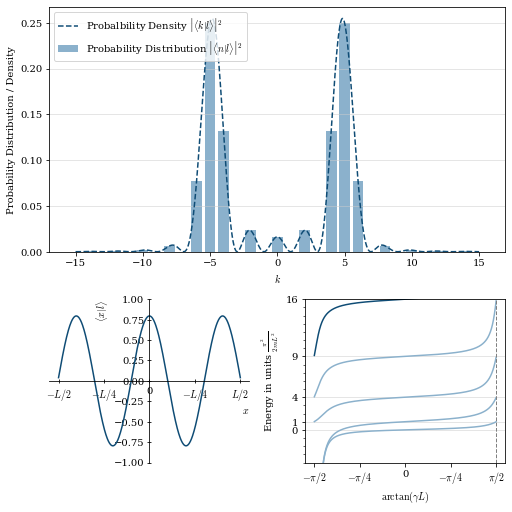

In [7]:
# DEPRECATED

# Testing momentum distribution (general case with gamma_+ = gamma_- =: gammma)
L = np.pi
gamma = 100
l = 5
bound = 15
cStep = 0.01
dStep = 1
x = np.linspace(-L/2, L/2, 500)
k = np.arange(-bound, bound+cStep, cStep)*np.pi/L
kn = np.arange(-bound, bound+dStep, dStep)*np.pi/L
# Computing all kl values corresponding to gamma
allKl = nr.gamma_to_k(gamma, l, L)
# Computing the continuous momentum prob. density (old concept)
distr = nr.P_momentumContinuous(k, allKl, l, L)
# Computing the discrete monmentum prob. dirst. (new concept)
distrDisc = nr.getP_momentumDiscrete(kn, allKl, l, L)
# Computing the energy eigenstates corresponding to the determined kl values
states = nr.energyState(allKl, l, L, x)
# Plotting
plotAll(gamma, l, L, k, distr, kn, distrDisc, x, states)


In [2]:
f = lambda kappa, k: 1/np.pi*np.power(1+np.sinh(kappa)*np.cosh(kappa)/(kappa),-1)*((kappa**2+k**2)*np.sinh(kappa)**2 + 4*k**2*np.sin(k/2)**2 + 2*k*np.sin(k/2)*np.sinh(kappa)*2*(kappa*np.cos(k/2)+k*np.sin(k/2)))/(kappa**2+k**2)**2